# check coco dataset

In [1]:
import json
import os

In [12]:
path = "/root/autodl-tmp/seat_dataset/chengdu_customer/"

coco_file = os.path.join("/root/autodl-tmp/seat_dataset/chengdu_customer/_classification.coco.json")

with open(coco_file, "r") as f:
    coco_data = json.load(f)

# print(coco_data)

In [13]:
coco_data["categories"]

[{'id': 0, 'name': '缺陷', 'supercategory': 'none'},
 {'id': 1, 'name': '背景', 'supercategory': 'none'}]

/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/root/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38519 (\N{CJK UNIFIED IDEOGRAPH-9677}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


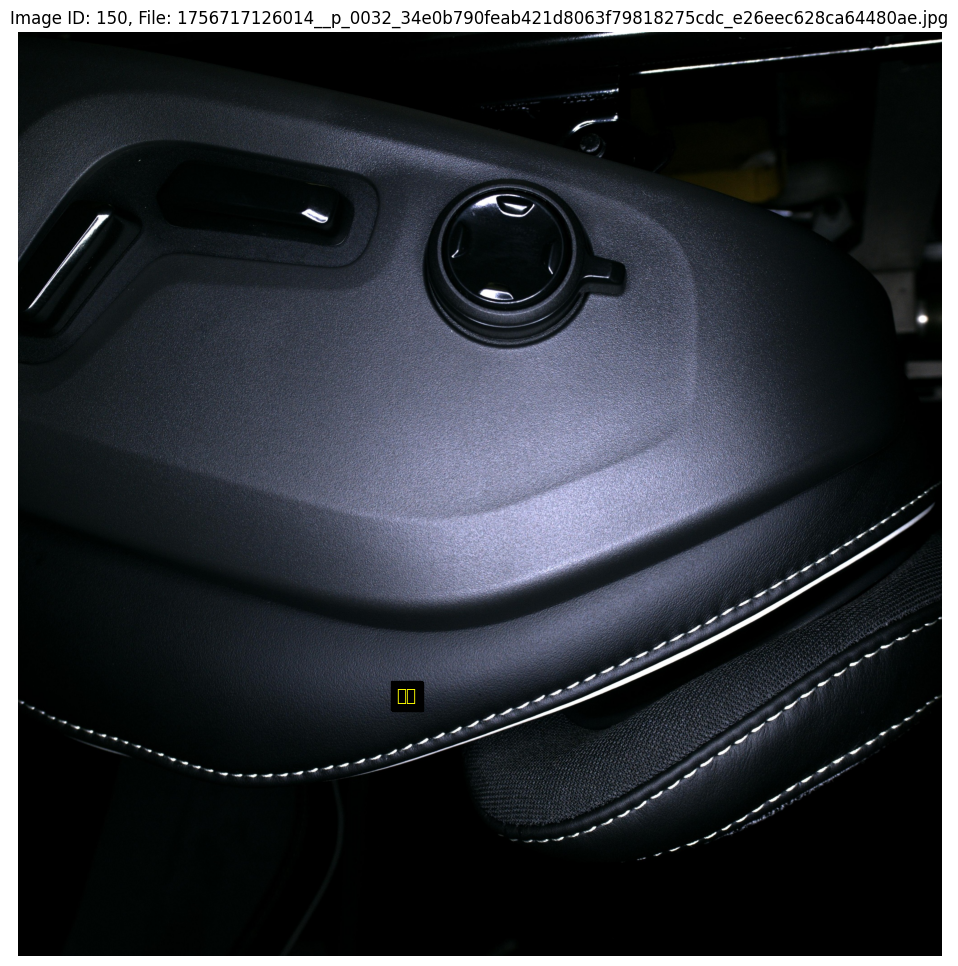

In [14]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# 随机选择一张图片
images = coco_data["images"]
annotations = coco_data["annotations"]
categories = {cat["id"]: cat["name"] for cat in coco_data["categories"]}

img_info = random.choice(images)
img_id = img_info["id"]
img_path = os.path.join(path, img_info["file_name"])

# 读取图片
img = cv2.imread(img_path)
if img is None:
    print(f"图片未找到: {img_path}")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 获取该图片的所有标注框
    anns = [ann for ann in annotations if ann["image_id"] == img_id]

    # 可视化
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.imshow(img)
    for ann in anns:
        bbox = ann["bbox"]  # [x, y, w, h]
        rect = patches.Rectangle(
            (bbox[0], bbox[1]), bbox[2], bbox[3],
            linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        cat_name = categories.get(ann["category_id"], str(ann["category_id"]))
        ax.text(
            bbox[0], bbox[1] - 2, cat_name,
            fontsize=12, color='yellow', backgroundcolor='black'
        )
    ax.set_title(f"Image ID: {img_id}, File: {img_info['file_name']}")
    plt.axis('off')
    plt.show()
